# Decision Tree | 의사 결정 트리

**결정 트리는 분류**(Classification)과 회귀(Regression) 모두 가능한 지도 학습 모델 중 하나이다. 결정 트리는 스무고개 하듯이 예/아니오 질문을 이어가며 학습한다.

아래의 그림을 확인하면 바로 이해가 된다.

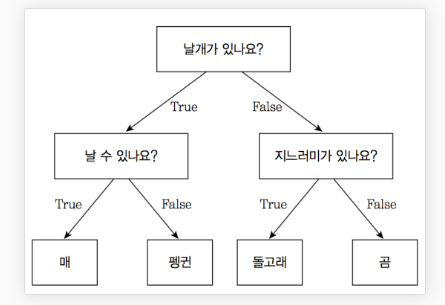

이렇게 특정 기준(질문)에 따라 데이터를 구분하는 모델을 결정 트리 모델이라고 한다. 정답을 담은 네모 상자를 노드(Node)라고 한다. 맨 위에 있는 첫질문을 Root Node라고 하고 맨 마지막 노드를 Terminal Node or Leaf Node라고 한다.

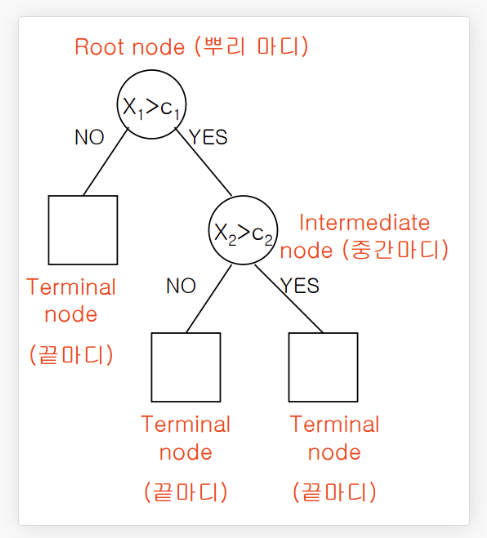


### - 프로세스

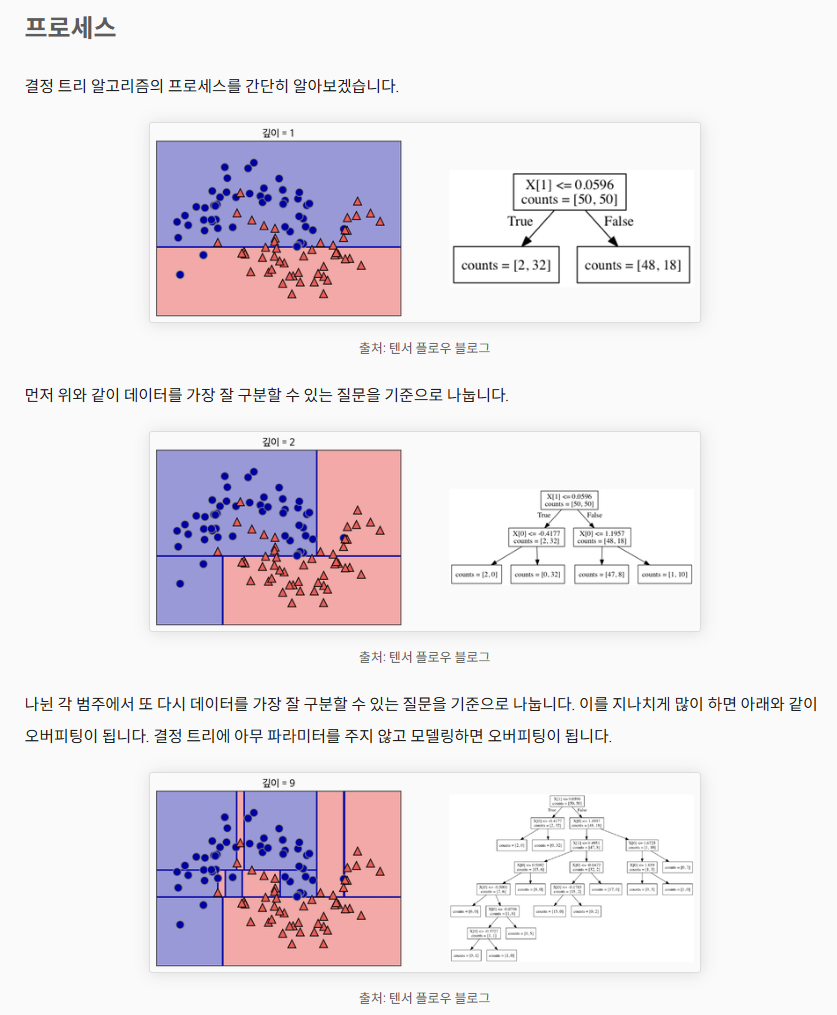

### - 가지치기(Pruning)

오버피팅을 막기 위한 전략으로 가지치기라는 기법을 사용한다. 트리에 가지가 너무 많다면 오버피팅이라고 볼 수 있다. 그래서 최대 깊이 또는 터미널 노드의 최대개수, 한 노드가 분할하기 위한 최소 데이터 수를 제한한다.

- min_sample_split = 10

이면 한 노드에 10개의 데이터가 있다면 그 노드는 더 이상 분기를 하지 않는다.

- max_depth = 4

이면 깊기가 4보다 크게 가지를 치지 않는다.

### - 불순도(Impurity)

불순도란 해당 범주 안에 서로 다른 데이터가 얼마나 섞여 있는지를 뜻한다.



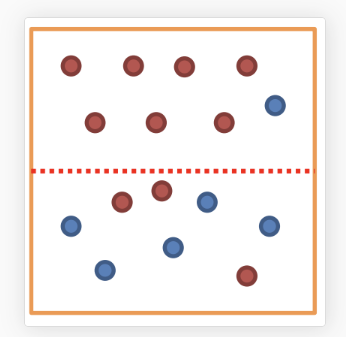


- 한 범주에 하나의 데이터만 있다. -> 불순도 최소

- 한 범주에 여러개의 데이터가 있다 -> 불순도 최대

### - 엔트로피(Entropy)

불순도를 수치적으로 나타낸 척도이다.

- 엔트로피가 높다 -> 불순도가 높다
- 엔트로피가 낮다 -> 불순도가 낮다

엔트로피가 1이면 불순도 최대인 것이다,
반대로 엔트로피가 0이면 불순도는 최소


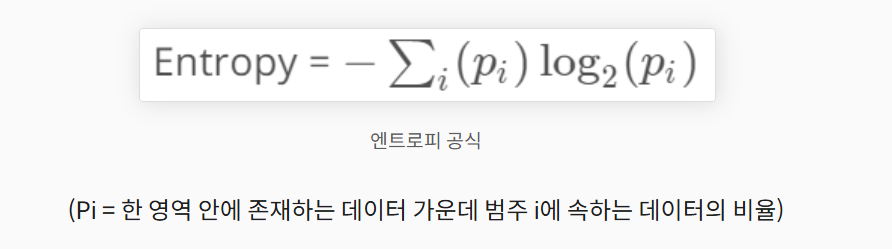

### - 정보 획득(Information Gain)

엔트로피가 1인 상태에서 0.7인 상태로 바뀌었다면 정보 획득dms 0.3입니다. 분기 이전의 엔트로피에서 분기 이후의 엔트로피를 뺀 수치를 정보 획득이라고 한다.

공식 : information gain = entropy(parent) - [weigth average]entropy(children)

어느 feature의 어느 분기점에서 정보 획득이 최대화되는지 판단을 해서 분기가 진행된다.



출처 : https://bkshin.tistory.com/entry/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D-4-%EA%B2%B0%EC%A0%95-%ED%8A%B8%EB%A6%ACDecision-Tree

### - 지니 계수

지니계수는 통계적 분산 정도를 정량화해서 표현한 값, 0과 1 사이의 값을 가진다.
지니계수가 높을 수록 잘 분류되지 못한 것이다.

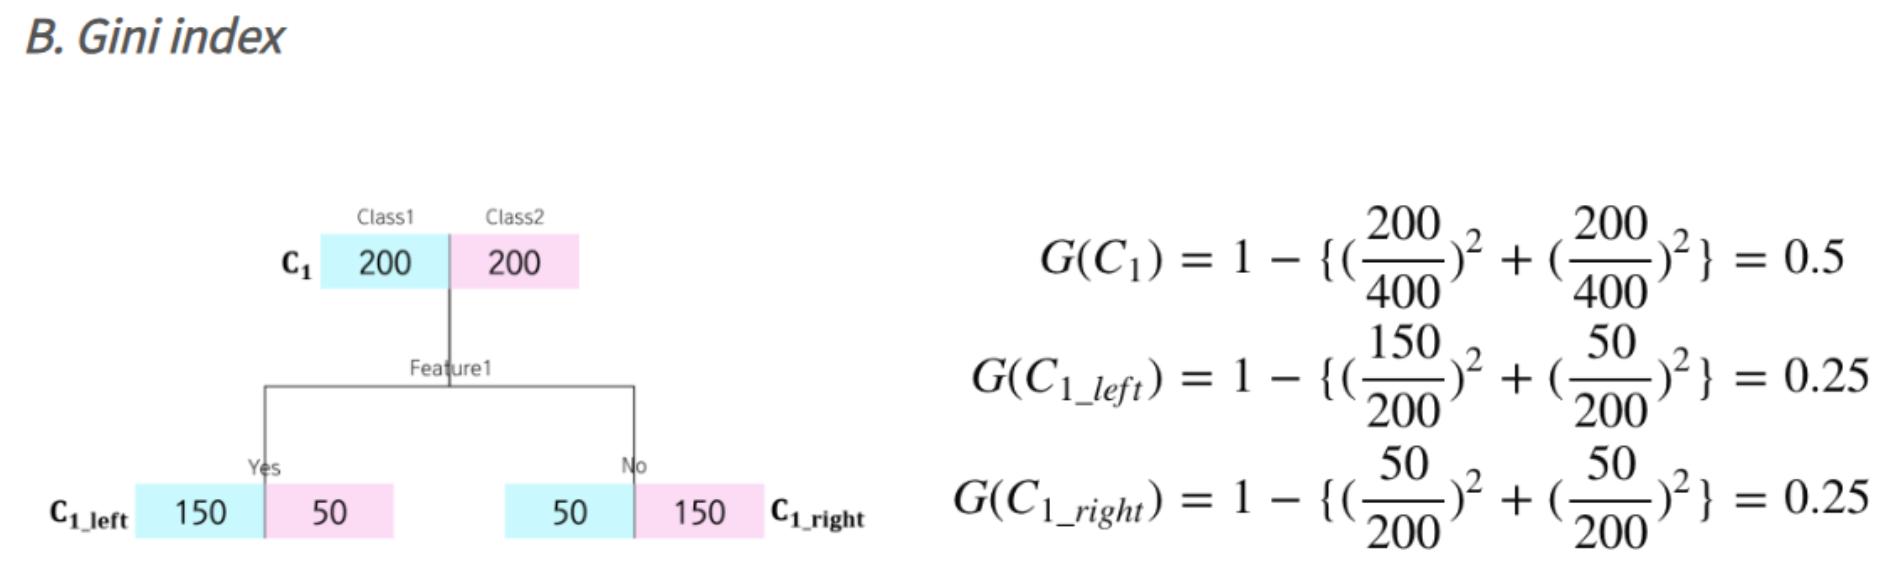

### - 결정 트리에서 정규화를 안하는 이유




- 결정 트리는 "비교"를 기반으로 작동하기 때문에 데이터 크기에 대해 영향을 받지 않느다.

- 결정트리는 데이터의 "절대적인 크기"가 아니라 "상대적인 조건"을 사용해서 분할하기 때문이다.

  결론적으로, 아래 실습에서 데이터를 정규화하지 않는다.

### - 엔트로피나 지니 지수에서




- 엔트로피나 지니 지수 또한 데이터의 크기에 영향을 받지 않는다.

- 한마디로 "얼마나 잘 분류되는지"를 평가하기 때문이다.

- 이 값들은 "비율"로 계산되기 때문에 데이터 크기 자체가 달라도 같은 결과가 나오게 된다.

예를 들어,



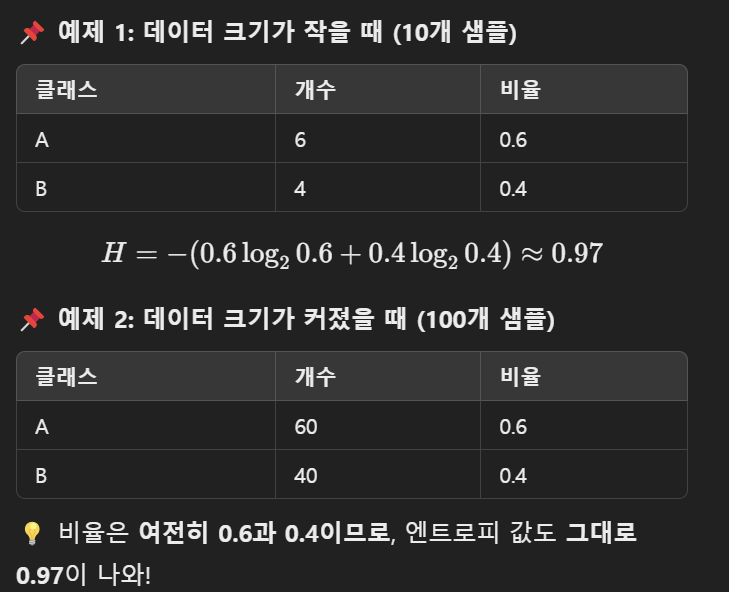

### - 실습 Practice



In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

#print(cancer.data)
#print(cancer.feature_names)
#print(cancer.target)
#print(cancer.target_names)

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

# stratify = 데이터를 나눌때 라벨 비율을 유지하기 위해서
# 예를 들어, 전체 데이터에서 cancer.target이 0: 35%, 1:65%인 경우 훈련데이터와 테스트 데이터에서도 동일한 비율로 나뉜다.
tree = DecisionTreeClassifier(random_state=0)

tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))


훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937
